In [7]:
<img src='isothermal.jpg'>

SyntaxError: invalid syntax (<ipython-input-7-e80537e33874>, line 1)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Antoine's equations
A = 'acetaldehyde'
B = 'ethanol'

def PsatA(T):
    return 10**(7.25504 - 1110.4/(T +233.451))

def PsatB(T):
    return 10**(8.04494 - 1554.3/(T + 222.65))


from scipy.optimize import brentq

def Tboil(Psat,P):
    return brentq(lambda T: Psat(T) - P,0,100)

print ("Normal boiling  point of {:s} is {:.4f} deg C".format(A,Tboil(PsatA,760)))
print ("Normal boiling point of {:s} is {:.4f} deg C".format(B,Tboil(PsatB,760)))


Normal boiling  point of acetaldehyde is 20.3996 deg C
Normal boiling point of ethanol is 78.3302 deg C


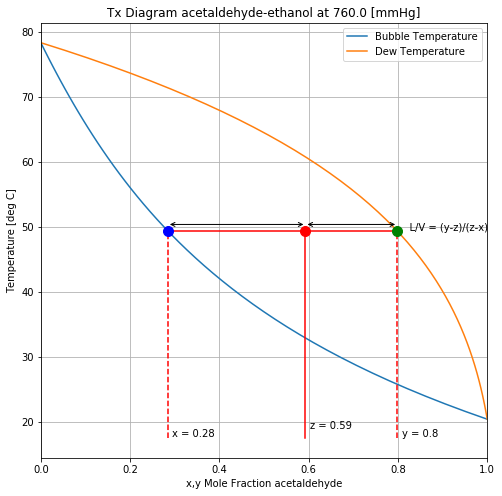

In [9]:
P = 760

T = np.linspace(Tboil(PsatA,P),Tboil(PsatB,P))

def xA(T):
    return (P - PsatB(T))/(PsatA(T)-PsatB(T))

def yA(T):
    return xA(T)*PsatA(T)/P




plt.figure(figsize=(8,8))
plt.plot(xA(T), T, yA(T), T)
plt.title('Tx Diagram {:s}-{:s} at {:.1f} [mmHg]'.format(A,B,P))
plt.legend(['Bubble Temperature','Dew Temperature'],loc='best')
plt.ylabel('Temperature [deg C]')
plt.xlabel('x,y Mole Fraction {:s}'.format(A))
plt.xlim(0,1)
plt.grid();

Te = np.mean(T)
xe = xA(Te)
ye = yA(Te)
ze = 0.4*xe + 0.6*ye


ax = plt.axis() #to store xmin,xmax,ymin,ymax

plt.plot([ze,ze],[ax[2],Te],'r')
plt.plot([xe,ye],[Te,Te],'r')
plt.plot([xe,xe],[ax[2],Te],'r--',[ye,ye],[ax[2],Te],'r--')

plt.text(xe+0.01,ax[2]+0.2,'x = {:.2}'.format(xe))
plt.text(ye+0.01,ax[2]+0.2,'y = {:.2}'.format(ye))
plt.text(ze+0.01,ax[2]+1.5,'z = {:.2}'.format(ze))

plt.annotate('', (xe,Te+1), (ze,Te+1), arrowprops={'arrowstyle':'<->'})
plt.annotate('', (ze,Te+1), (ye,Te+1), arrowprops={'arrowstyle':'<->'})

plt.annotate('    L/V = (y-z)/(z-x)',(ye,Te))

plt.plot(xe,Te,'bo',ms = 10)
plt.plot(ye,Te,'go',ms = 10)
plt.plot(ze,Te,'ro',ms = 10)

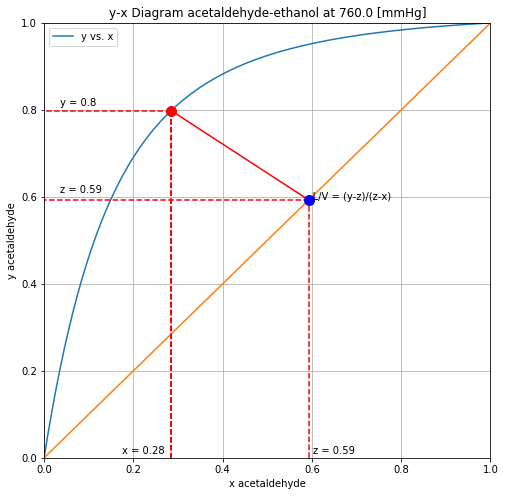

In [10]:
P = 760

T = np.linspace(Tboil(PsatA,P),Tboil(PsatB,P))

def xA(T):
    return (P - PsatB(T))/(PsatA(T)-PsatB(T))

def yA(T):
    return xA(T)*PsatA(T)/P

plt.figure(figsize=(8,8))

plt.plot(xA(T), yA(T),xA(T), xA(T))
plt.title('y-x Diagram {:s}-{:s} at {:.1f} [mmHg]'.format(A,B,P))
plt.legend(['y vs. x'],loc='best')
plt.ylabel('y {:s}'.format(A))
plt.xlabel('x {:s}'.format(A))
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid();

Te = 49.36
xe = xA(Te)
ye = yA(Te)
ze = 0.4*xe + 0.6*ye


ay = plt.axis() #to store xmin,xmax,ymin,ymax


plt.plot([ze,xA(Te)],[ze,yA(Te)],'r')
plt.plot([ze,ze],[ay[0],ze],'r--',[xe,xe],[ye,ay[0]],'r--')
plt.plot([xe,ay[0]],[ye,ye],'r--',[xe,xe],[ye,ay[0]],'r--')
plt.plot([ze,ay[0]],[ze,ze],'r--',[xe,xe],[ye,ay[0]],'r--')

plt.text(xe-0.11,ay[2]+0.01,'x = {:.2}'.format(xe))
plt.text(xe-0.25,ay[2]+0.81,'y = {:.2}'.format(ye))
plt.text(xe-0.25,ay[2]+0.61,'z = {:.2}'.format(ze))
plt.text(ze+0.01,ay[2]+0.01,'z = {:.2}'.format(ze))

plt.annotate('-L/V = (y-z)/(z-x)',(ze,ze))

plt.plot(ze,ze,'bo',ms = 10)
plt.plot(xA(Te),yA(Te),'ro',ms = 10)
